# Part 04. 시각화

<br>

-----------------

<p style='color:#726a77; text-align:right'>양여진</p>

## 2장. 그래프

<br>

### 0절. Matplotlib
- Python 프로그래밍 언어 및 숫자 수학 확장 NumPy를위한 플로팅 라이브러리

<br>

### 1절. 점 그래프

좌표 상에 점을 그려주는 함수

> plt.plot(x축, y축, marker)<br>
> plt.scatter(x축, y축, c='색', marker='모양')


##### x축, y축의 범위

> plt.xlim(start: float, end: float)<br>
> plt.ylim(start: float, end: float)


##### x축, y축의 이름

> plt.xlabel('축 이름', fontsize=정수)<br>
> plt.ylabel('축 이름', fontsize=정수)


In [34]:
import pandas as pd
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri
from pandas import DataFrame

# 데이터 불러오기
pandas2ri.activate()
r.data('iris')
iris = r['iris']
iris.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


<b>[예제]</b>

iris 데이터의 Patal.Length와 Patal.Width 변수에 대한 산점도를 그려라.<br>
X축 이름은 Patal.Length, Y축 이름은 Patal.Width로 지정하고 각 변수의 범위에 맞게 X축의 범위는 0 ~ 8, Y축의 범위는 0 ~ 3으로 지정한다.

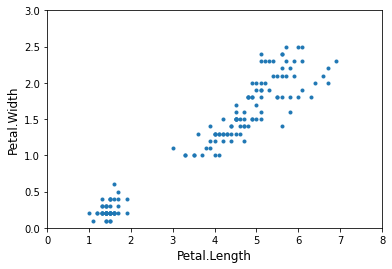

In [32]:
import matplotlib.pyplot as plt

# 산점도를 그리는 부분
plt.plot(iris['Petal.Length'], iris['Petal.Width'], 'o', markersize=3)

# 플롯의 좌표평면을 생성하는 부분
plt.xlabel('Petal.Length', fontsize=12)
plt.ylabel('Petal.Width',fontsize=12)
plt.xlim(0,8)
plt.ylim(0,3)

# plot를 화면에 출력하는 부분
plt.show()

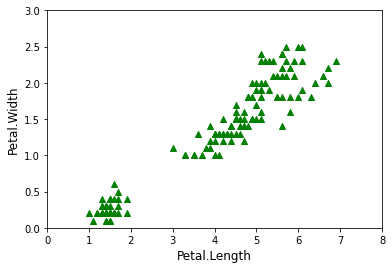

In [30]:
# import matplotlib.pyplot as plt

plt.scatter(iris['Petal.Length'], iris['Petal.Width'], c='green', marker='^')
plt.xlabel('Petal.Length', fontsize=12)
plt.ylabel('Petal.Width',fontsize=12)
plt.xlim(0, 8)
plt.ylim(0, 3)
plt.show()

### 2절. 선 그래프

<br>

#### 1. 꺾은선 그래프

여러 범주에 대한 관측값을 비교하거나 시간의 흐름에 따른 데이터에서 추세를 파악하기 위해 사용

X축은 정렬되어 있어야 함

> plt.plot(x축, y축, data=데이터, ls='-/--/-./:', lw=int_value, c='color')  # ls: 선 스타일, lw:선 굵기<br>
> plt.legend(['항목 이름1','항목 이름2'])

<br>

<b>[예시]</b> Cars93에서 EngineSize에 따른 Type 별 Price의 관측값을 살펴보자

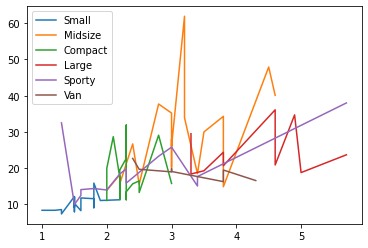

In [67]:
# import pandas as pd
# from rpy2.robjects.packages import importr
# from rpy2.robjects import r, pandas2ri
# from pandas import DataFrame

MASS = importr("MASS")
r.data('Cars93')
Cars93 = r['Cars93']

car_sorted = Cars93.sort_values(by=['EngineSize'])
car_type = ['Small', 'Midsize', 'Compact', 'Large', 'Sporty', 'Van']

for i in car_type:
    plt.plot('EngineSize', 'Price', data=car_sorted.loc[car_sorted['Type']==i])

plt.legend(car_type)
plt.show()

<b>[예제]</b> 

cars 데이터는 자동차의 속도(speed)와 제동거리(dist)로 이루어져 있다<br>
데이터의 두 변수에 대한 산점도를 그리고, cars 데이터에 lowess를 적용한 선을 덧그려라

<br>

<b>LOWESS</b> : 지역 선형 가중 다항식 회귀
- 주변에 위치한 점들을 이용해 특정한 점을 추정하는 다항식을 찾는 것

In [107]:
# pip install plotly
import numpy as np
from sklearn.linear_model import LinearRegression # 회귀모델 생성
import statsmodels.api as sm # LOWESS model 생성
import plotly.graph_objects as go # 시각화
import plotly.express as px # 시각화

r.data('cars')
cars = r['cars']

# x, y 데이터
x = cars['speed'].values
y = cars['dist'].values

# lowess
lowess = sm.nonparametric.lowess
y_hat = lowess(y, x, frac=2/3)

fig = px.scatter(cars, x=cars['speed'], y=cars['dist'], opacity=0.8, color_discrete_sequence=['black']) # 산포도
fig.add_traces(go.Scatter(x=y_hat[:,0], y=y_hat[:,1], name='LOWESS', line=dict(color='orange'))) # lowess 라인
fig.update_layout(title=dict(text="Stopping Distance versus Speed", font=dict(color='black'))) # 제목 지정

# 스타일
fig.update_layout(dict(plot_bgcolor = 'white'))  # 배경색 지정
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', # 그리드 지정
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

#### 1. 직선 그래프

y = ax+b 형태의 직선이나 y=h 형태의 가로선 혹은 x=v 형태의 세로선

> plt.plot(x축, 회귀식, data=데이터, c='color') &emsp;<span style="color:green"># y = ax+b 형태의 직선</span><br>
> plt.hlines(y, xmin , xmax) &emsp;<span style="color:green"># y=h 형태의 수평선</span><br>
> plt.vlines(x, ymin , ymax) &emsp;<span style="color:green"># x=v 형태의 수직선</span>


<br>

<b>[예제]</b> 

cars에서 speed와 dist 사이의 선형회귀모형을 생성한 뒤, 직선 그래프로 표현하기

선형 회귀식에 대한 그래프는 speed와 dist에 대한 산점도 위에 나타내며, 색상은 빨강으로 지정하여 표현

dist의 중위수는 수평선, speed의 중위수는 수직선으로 그리되 각각의 선은 점 스타일의 회색 선으로 지정

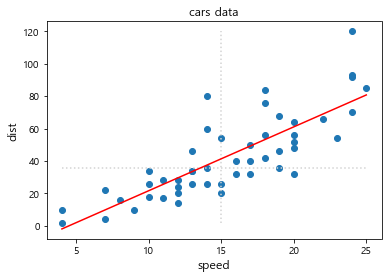

In [140]:
from sklearn.linear_model import LinearRegression

r.data('cars')
cars = r['cars']

lr = LinearRegression() # 회귀모델 선언
x = cars['speed'].values.reshape(-1,1)
lr.fit(x, cars['dist']) # 회귀모델 생성

plt.scatter(cars['speed'], cars['dist']) # 원 데이터 산포도
plt.plot(cars['speed'], lr.predict(x), 'r-') # 회귀직선
plt.hlines(np.median(cars['dist']),np.min(cars['speed']),np.max(cars['speed']), 'lightgrey',':') # dist의 중위수 수평선
plt.vlines(np.median(cars['speed']),np.min(cars['dist']),np.max(cars['dist']), 'lightgrey',':') # speed의 중위수 수직선


plt.xlabel('speed', fontsize=12)
plt.ylabel('dist',fontsize=12)
plt.title('cars data')
plt.show()

#### 2. 곡선 그래프

R과 달리 곡선 그래프도 plot() 함수로 그릴 수 있다


<br>

<b>[예제]</b> 

평균이 0이고 표준편차가 1인 확률밀도함수를 생성하고 그래프로 나타내기

x축의 범위는 -3 ~ +3으로 한다

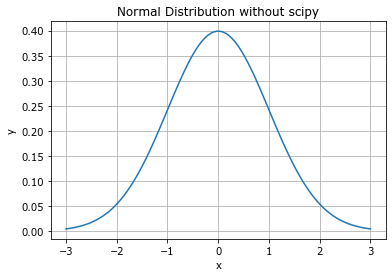

In [145]:
# import matplotlib.pyplot as plt
# import numpy as np
import scipy.stats as stats

# np.linspace(min, max, cnt) : 지정된 간격 동안 균등 한 간격의 숫자를 반환
# -3에서 3까지 100등분하여 값을 지정함
x = np.linspace(-3, 3, 100)
# stats.norm(mean, sd) : 확률밀도를 계산해주는 함수
y1 = stats.norm(0, 1).pdf(x)

plt.plot(x, y)
plt.xlabel("x") # x축 레이블 지정
plt.ylabel("y") # y축 레이블 지정
plt.grid() # 플롯에 격자 보이기
plt.title("Normal Distribution without scipy")
plt.show()

### 3절. 막대 그래프

pyplot의 bar() 함수를 사용하여 막대그래프를 그릴 수 있음

> plt.bar(x, height, width=0.8, bottom=None, align='center', data=None, color='black', edgecolor='black')

수평으로 표현된 막대 그래프는 barh() 함수로 그린다

> plt.barh(x, height, width=0.8, bottom=None, align='center', data=None, color='black', edgecolor='black')

<br>

<b>[예제]</b> 

Cars93 데이터의 Origin 변수는 해당 차량이 미국에서 제조되었는지 타국에서 제조되었는지를 나타낸다<br>
Cylinders 변수는 실린더의 수를 나타내며, 총 6개의 범주로 이루어져 있다<br>
두 범주형 변수의 각 레벨에 속하는 데이터의 개수를 막대그래프로 나타내어라

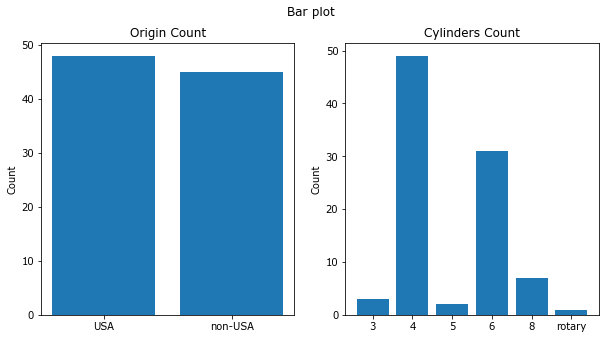

In [251]:
# import pandas as pd
# from rpy2.robjects.packages import importr
# from rpy2.robjects import r, pandas2ri
# from pandas import DataFrame

MASS = importr("MASS")
r.data('Cars93')
Cars93 = r['Cars93']

Origin_cnt = pd.value_counts(Cars93['Origin'].values, sort=False)
Cylinders_cnt = pd.value_counts(Cars93['Cylinders'].values, sort=False)

# 두개의 플롯을 그려야 하므로 두 개의 서브플롯을 선언
# fig는 플롯이 나타날 전체 figure, axs[n]은 n번째 서브플롯을 나타냄
fig, axs = plt.subplots(1, 2,figsize=(10,5))
fig.suptitle('Bar plot')

axs[0].bar(Origin_cnt.index, Origin_cnt.values)
axs[0].set_title('Origin Count')
axs[0].set_ylabel('Count')
axs[1].bar(Cylinders_cnt.index, Cylinders_cnt.values)
axs[1].set_title('Cylinders Count')
axs[1].set_ylabel('Count')
plt.show()

<b>[예제]</b> 여러 개의 범주형 변수를 막대그래프에 표현하기

Cars93 데이터의 Origin과 Cylinders 변수의 범주별 데이터 개수를 막대그래프로 한 번에 표현하고 범례를 함께 나타내기

In [179]:
from pandas import crosstab

table = pd.crosstab(Cars93['Cylinders'], Cars93['Origin'])
table

Origin,USA,non-USA
Cylinders,,
3,0,3
4,22,27
5,0,2
6,20,11
8,6,1
rotary,0,1


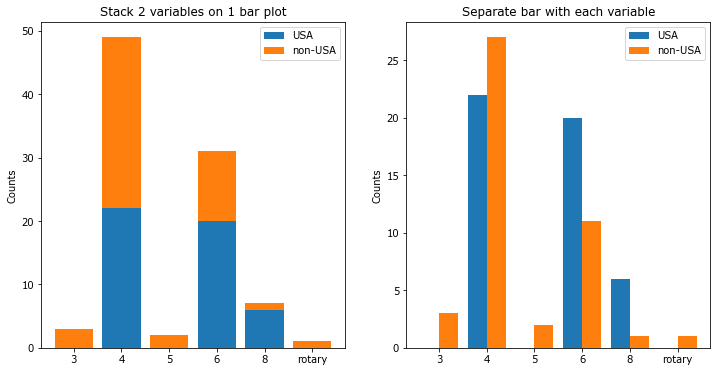

In [252]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
width = 0.4

# 두 개의 플롯을 선언하고 그 중 하나에서 bottom 인수를 사용하여 다른 값 아래에 위치하게 함
axs[0].bar(table['USA'].index, table['USA'].values, label='USA')
axs[0].bar(table['non-USA'].index, table['non-USA'].values, bottom=table['USA'].values, label='non-USA')
axs[0].set_ylabel('Counts')
axs[0].set_title('Stack 2 variables on 1 bar plot')
axs[0].legend()

# 범주의 개수(ind)를 세어 플롯의 x 인자에 임시 할당하고 x인자에서 두께를 감산
# 각 bar plot에 두께를 지정
# plt.xticks(ind + width / 2, table['USA'].index)
idx = list(table['non-USA'].index)
ind = np.arange(1, len(idx)+1)

axs[1].bar(ind - width/2, table['USA'].values, width, label='USA')
axs[1].bar(ind + width/2, table['non-USA'].values, width, label='non-USA')
axs[1].set_xticks(ind) # set_xticklabels 호출 이전에 선행해서 호출되어야 함 (눈금 고정)
axs[1].set_xticklabels(idx) # bar 플롯 x축의 범주를 문자열 값으로 변경
axs[1].set_ylabel('Counts')
axs[1].set_title('Separate bar with each variable')
axs[1].legend()

plt.show()

### 4절. 히스토그램

도수별 분포를 나타내는 도수분포표를 그래프로 그린 것

<div style="font-weight: bold; font-size: 120%; margin-left:30px"> 
    <table align="left" margin:50 font-size: 120%>
        <tr>
            <td style="text-align: left;" rowspan="2">막대그래프</td>
            <td style="text-align: left;"><span style='color: #DC143C'>범주형</span>으로 구분된 변수의 범주별 데이터 수를 구한 것</td>
        </tr>
        <tr>
            <td style="text-align: left;">범주의 순서를 의도에 따라 변경 가능<td>
        </tr>
        <tr>
            <td style="text-align: left;" rowspan="2">히스토그램</td>
            <td style="text-align: left;"><span style='color: #DC143C'>연속된 수</span>를 일정한 구간으로 나눈 후 구간별 데이터의분포를 그래프로 표현한 것</td>
        </tr>
        <tr>
            <td style="text-align: left;">임의로 범주의 순서를 바꿀 수 없음<td>
        </tr>
    </table>
</div>

> plt.hist(x, bins=None, range=None, density=False, color=None, data=None)

bins : 히스토그램의 구간의 개수 정의<br>
range : bin의 상한값과 하한값 (x.min(), x.max()) 형태로 선언<br>
density : True이면 확률밀도함수를 그리고 반환

<br>

<b>[예제]</b>

iris 데이터의 Petal.Length 변수에 대해 막대 구간의 개수를 지정하지 않은 히스토그램과 구간의 개수를 5로 지정한 히스토그램 그리기

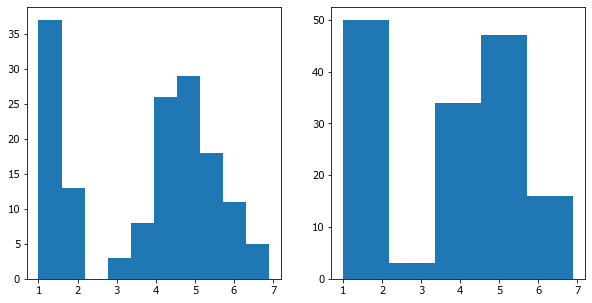

In [262]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].hist('Petal.Length', data=iris)
axs[1].hist('Petal.Length', bins=5, data=iris)

plt.show()

### 5절. 파이차트

범주별 구성 비율을 원에 나누어 표현한 그래프

전체 대비 범주별 비율을 비교할 때 사용할 수 있음

> plt.pie(x, labels=None, colors=None)

<br>

<b>[예제]</b>

Cars93 데이터의 Cylinders 변수의 범주별 데이터의 수를 파이차트로 나타내기

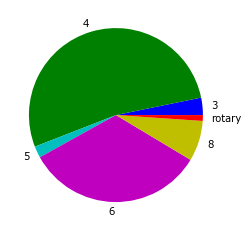

In [285]:
Cylinders_cnt = pd.value_counts(Cars93['Cylinders'].values, sort=False)

plt.pie(Cylinders_cnt.values, labels=Cylinders_cnt.index, colors=['b', 'g', 'c', 'm', 'y', 'r'])
plt.show()

### 6절. 산점도 행렬

두 개 이상의 변수가 있는 데이터에서 변수들 간의 산점도를 그린 그래프

여러 변수들 간의 산점도를 한 번에 볼 수 있도록 표현하여 변수들 간의 상관관계를 비교할 수 있음

pyplot보다는 seaborn이나 pandas를 이용하는 것이 간단함

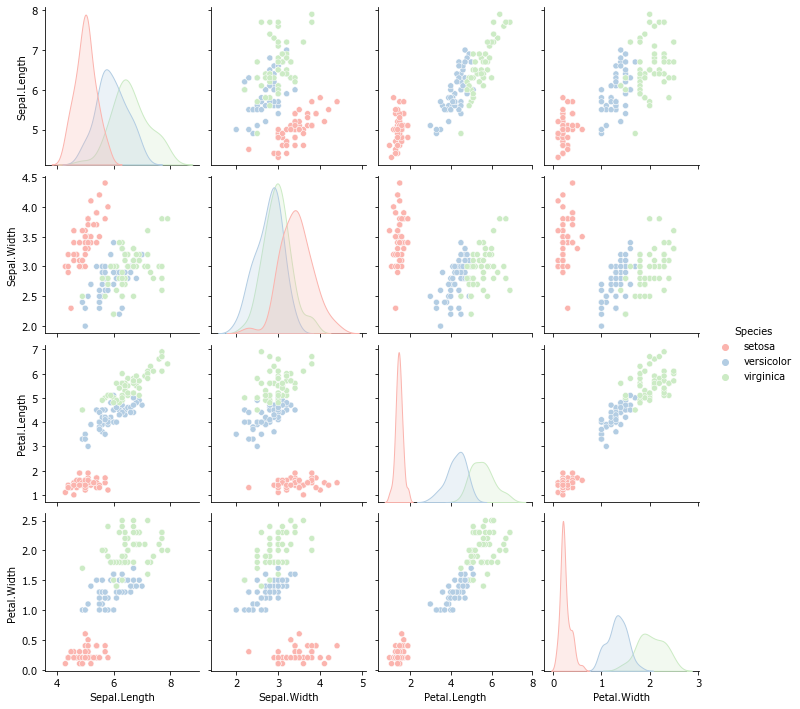

In [296]:
# 범주형 변수의 범주에 따라 다른 색상으로 나타낼 수도 있음
import seaborn as sns

sns.pairplot(iris, diag_kind='kde', hue="Species", palette='Pastel1') # pastel, bright, deep, muted, colorblind, dark
plt.show()

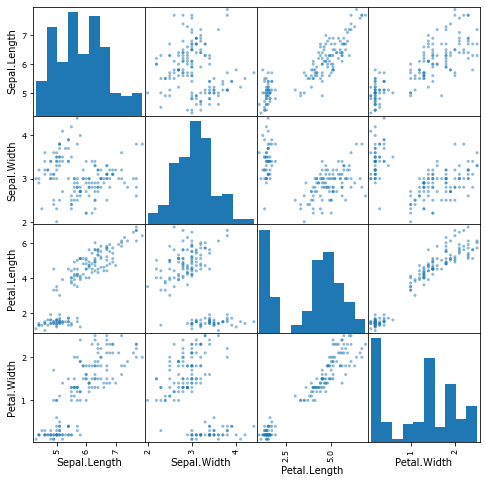

In [298]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris, alpha=0.5, figsize=(8, 8), diagonal='hist')
plt.show()

#### 비고. matplotlib에서 축과 제목에 한글 사용하기
>from matplotlib import font_manager, rc<br>
>font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()<br>
    &emsp;<span style="color:green"># 시스템에서 기본 한글폰트를 가져와 폰트 이름 지정</span><br>
>rc('font', family=font_name)<br>
    &emsp;<span style="color:green"># rc() 함수에 한글폰트 설정</span>

malgun : 맑은고딕<br>
REFSAN : 산세리프 (한글 폰트로 변환 후 에러가 발생할 때 다시 바꿔줌)